Jamison Hunter

June 12, 2023

# IMDB Data Exploration

In [16]:
# Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
# loading tmdb data
df_2000 = pd.read_csv(r"Data/final_tmdb_data_2000.csv.gz")
df_2001 = pd.read_csv(r"Data/final_tmdb_data_2001.csv.gz")
df_2002 = pd.read_csv(r"Data/final_tmdb_data_2002.csv.gz")
df_2003 = pd.read_csv(r"Data/final_tmdb_data_2003.csv.gz")
df_2004 = pd.read_csv(r"Data/final_tmdb_data_2004.csv.gz")
df_2005 = pd.read_csv(r"Data/final_tmdb_data_2005.csv.gz")
df_2006 = pd.read_csv(r"Data/final_tmdb_data_2006.csv.gz")
df_2007 = pd.read_csv(r"Data/final_tmdb_data_2007.csv.gz")

In [18]:
# combining the two frames into a single data frame
df_tmdb = pd.concat([df_2000, df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007])
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12209 entries, 0 to 1933
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                12209 non-null  object 
 1   adult                  12201 non-null  float64
 2   backdrop_path          6793 non-null   object 
 3   belongs_to_collection  975 non-null    object 
 4   budget                 12201 non-null  float64
 5   genres                 12201 non-null  object 
 6   homepage               1562 non-null   object 
 7   id                     12201 non-null  float64
 8   original_language      12201 non-null  object 
 9   original_title         12201 non-null  object 
 10  overview               11932 non-null  object 
 11  popularity             12201 non-null  float64
 12  poster_path            10840 non-null  object 
 13  production_companies   12201 non-null  object 
 14  production_countries   12201 non-null  object 
 15  rel

In [19]:
df_rev = df_tmdb["revenue"] > 0 
df_tmdb[df_rev].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2307 entries, 4 to 1872
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2307 non-null   object 
 1   adult                  2307 non-null   float64
 2   backdrop_path          2180 non-null   object 
 3   belongs_to_collection  476 non-null    object 
 4   budget                 2307 non-null   float64
 5   genres                 2307 non-null   object 
 6   homepage               651 non-null    object 
 7   id                     2307 non-null   float64
 8   original_language      2307 non-null   object 
 9   original_title         2307 non-null   object 
 10  overview               2303 non-null   object 
 11  popularity             2307 non-null   float64
 12  poster_path            2293 non-null   object 
 13  production_companies   2307 non-null   object 
 14  production_countries   2307 non-null   object 
 15  rele

In [20]:
df_bud = df_tmdb["budget"] > 0
df_tmdb[df_bud].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2905 entries, 1 to 1904
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2905 non-null   object 
 1   adult                  2905 non-null   float64
 2   backdrop_path          2308 non-null   object 
 3   belongs_to_collection  466 non-null    object 
 4   budget                 2905 non-null   float64
 5   genres                 2905 non-null   object 
 6   homepage               706 non-null    object 
 7   id                     2905 non-null   float64
 8   original_language      2905 non-null   object 
 9   original_title         2905 non-null   object 
 10  overview               2893 non-null   object 
 11  popularity             2905 non-null   float64
 12  poster_path            2760 non-null   object 
 13  production_companies   2905 non-null   object 
 14  production_countries   2905 non-null   object 
 15  rele

In [21]:
num = df_tmdb[df_rev]["revenue"].value_counts().sum()
print(f"There are {num} movies with valid revenue information available.")

There are 2307 movies with valid revenue information available.


In [22]:
num = df_tmdb[df_bud]["budget"].value_counts().sum()
print(f"There are {num} movies with valid budget information available.")

There are 2905 movies with valid budget information available.


In [23]:
# finding the film within the data with the highest budget
x = df_tmdb[df_bud]["budget"].max()
df_max = df_tmdb["budget"] == x
df_tmdb[df_max]

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
174,tt0449088,0.0,/xQkk0i3FrNSq7DTBlxRf9XJhH7l.jpg,"{'id': 295, 'name': 'Pirates of the Caribbean ...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",https://movies.disney.com/pirates-of-the-carib...,285.0,en,Pirates of the Caribbean: At World's End,...,961000000.0,169.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,0.0,7.241,13145.0,PG-13


In [24]:
# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

Text(0.5, 0, 'Number of Certifications')

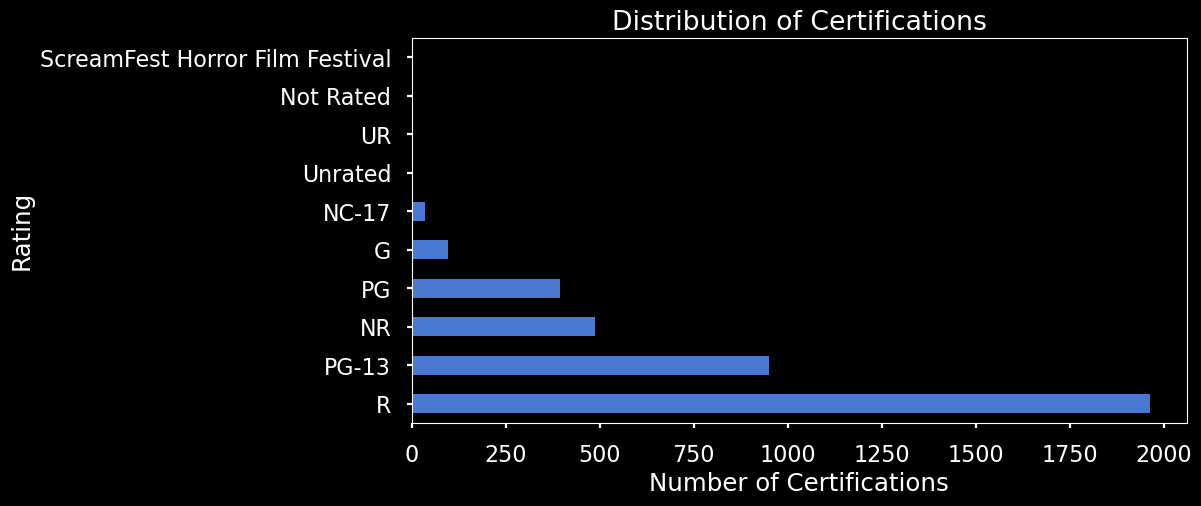

In [25]:
# generating a bar graph of certifications
fig, ax = plt.subplots(figsize=(10,5))
ax = df_tmdb["certification"].value_counts().plot(kind = "barh")
ax.set_title("Distribution of Certifications")
ax.set_ylabel("Rating")
ax.set_xlabel("Number of Certifications")

In [26]:
# writing a for loop in order to find the average of the data's certifications
for i in df_tmdb["certification"].unique():
    x = df_tmdb["certification"] == i
    avg = df_tmdb[x]["revenue"].mean()
    print(f"The average revenue for {i} films is {avg}")

The average revenue for nan films is nan
The average revenue for PG films is 66639412.60253165
The average revenue for R films is 15634261.433520121
The average revenue for G films is 58102588.6632653
The average revenue for NR films is 4695150.521472393
The average revenue for PG-13 films is 66059194.50526316
The average revenue for NC-17 films is 3480148.9166666665
The average revenue for Unrated films is 0.0
The average revenue for UR films is 0.0
The average revenue for Not Rated films is 0.0
The average revenue for ScreamFest Horror Film Festival films is 0.0


In [27]:
# writing a for loop in order to find the average of the data's certifications
for i in df_tmdb["certification"].unique():
    x = df_tmdb["certification"] == i
    avg = df_tmdb[x]["budget"].mean()
    print(f"The average budget for {i} films is {avg}")

The average budget for nan films is nan
The average budget for PG films is 23778792.50886076
The average budget for R films is 8744478.519612838
The average budget for G films is 23031632.714285713
The average budget for NR films is 1477528.1513292433
The average budget for PG-13 films is 26833536.057894737
The average budget for NC-17 films is 1668138.888888889
The average budget for Unrated films is 0.0
The average budget for UR films is 0.0
The average budget for Not Rated films is 0.0
The average budget for ScreamFest Horror Film Festival films is 0.0


In [28]:
# referencing previous Data folder and saving the combined frame as a csv file
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)
df_tmdb.to_csv(f"{FOLDER}tmdb_results_total.csv.gz")